In [2]:
import sys 
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

sys.path.append('../')
from helpers.ser_reader import reader

In [13]:
def get_center_of_mass(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    _, mask = cv.threshold(img, 200, np.max(img), cv.THRESH_BINARY)
    mask[mask < 1000] = 0
    mask[mask >= 1000] = 1
    
    mass_x, mass_y = np.where(mask >= 1)
    
    cent_x = np.average(mass_x)
    cent_y = np.average(mass_y)
    
    print(cent_x, cent_y)

    return mask

def aggregate_frames():
    pass

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of frames: 2000


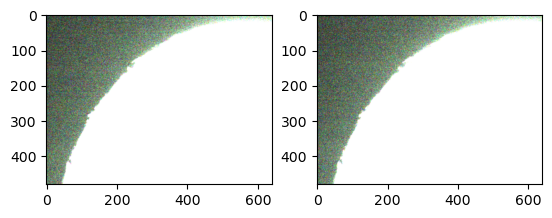

In [14]:
ser = reader('./data/raw/moon_1.SER')

print("Number of frames:", ser.header.frameCount)

frames = []

for n in range(ser.header.frameCount):
    if not(bool(n%1000)):
        frame = ser.getImg()
        frame = cv.cvtColor(frame, cv.COLOR_BAYER_GR2RGB)
        frames.append(frame)

plt.figure()
plt.subplot(121)    
plt.imshow(frames[0])

plt.subplot(122)    
plt.imshow(frames[1])


276.44936092005236 397.0899120975003
276.42997280767696 397.0672754777218


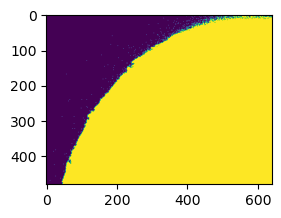

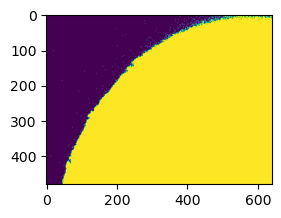

In [15]:
for frame in frames:
    mask = get_center_of_mass(frame)
    plt.figure()
    plt.subplot(121)    
    plt.imshow(mask)
    #plt.hist(mask)